# Exp 3. Sinusoidal oscillation

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def linear_fit_plot(x, y, title='Linear Fit', x_label='x', y_label='y',
					data_annotation='({:.2f}, {:.2f})',
					slope_annotation='{:.2f}',
					intercept_annotation='{:.2f}',
					r_value_annotation='{:.3f}'):
	'''
	Plot the data and the linear fit.
	Annotations of the slope, intercept, and R value are included.
	Annotate the x and y values of the data points.
	'''
	# Perform linear regression
	slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
	# Create the best fit line, slightly outside the data range
	extended_x_range = np.array([min(x) - 0.1 * (max(x) - min(x)), max(x) + 0.1 * (max(x) - min(x))])
	best_fit_line = slope * extended_x_range + intercept
	# Change the font to support Chinese characters
	plt.rcParams['font.sans-serif'] = ['SimHei']
	# Plot the data
	plt.plot(x, y, 'b^', label='Data')
	# Annotate the x and y values of the data points
	for i in range(len(x)):
		# make the label below and to the right of the point
		plt.annotate(data_annotation.format(x[i], y[i]), xy=(x[i], y[i]), xytext=(5, -5), textcoords='offset points')
	plt.plot(extended_x_range, best_fit_line, 'r-', label='Best Fit Line')
	# Annotate the slope, intercept, and R value
	plt.annotate("Slope : " + slope_annotation.format(slope), xy=(0.05, 0.9), xycoords='axes fraction')
	plt.annotate("Intercept : " +intercept_annotation.format(intercept), xy=(0.05, 0.85), xycoords='axes fraction')
	plt.annotate("R : " + r_value_annotation.format(r_value), xy=(0.05, 0.8), xycoords='axes fraction')
	# Add labels and title
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.title(title)
	plt.legend(loc=4)
	# Show the plot
	plt.show()

def scatter_plot(x, y, title='Scatter', x_label='x', y_label='y',
					data_annotation='({:.2f}, {:.2f})'):
	'''
	Plot the data as a scatter plot.
	Annotate the x and y values of the data points.
	'''
	# Change the font to support Chinese characters
	plt.rcParams['font.sans-serif'] = ['SimHei']
	# Plot the data
	plt.plot(x, y, 'b^', label='Data')
	# Annotate the x and y values of the data points
	for i in range(len(x)):
		# make the label text vertical to avoid overlapping
		plt.annotate(data_annotation.format(x[i], y[i]), xy=(x[i], y[i]), xytext=(5, -5), textcoords='offset points', rotation=90)
	# Add labels and title
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.title(title)
	# Show the plot
	plt.show()


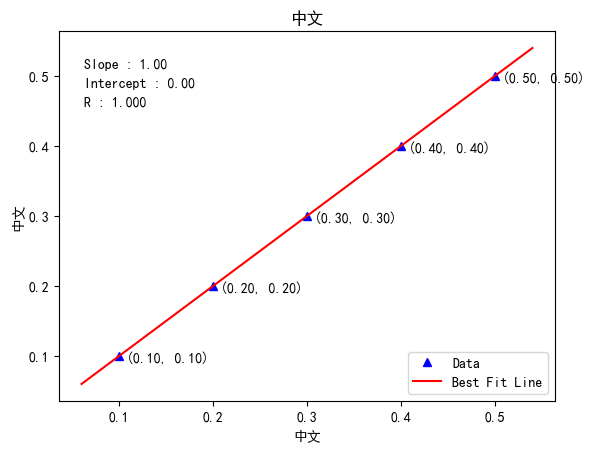

In [132]:
x = np.array([1, 2, 3, 4, 5]) * 0.1
y = np.array([1, 2, 3, 4, 5]) * 0.1
linear_fit_plot(x, y, "中文", "中文", "中文")

## 1. Measurement of the coefficient of stubbornness of springs with Joly's scale

k1 = 2.538


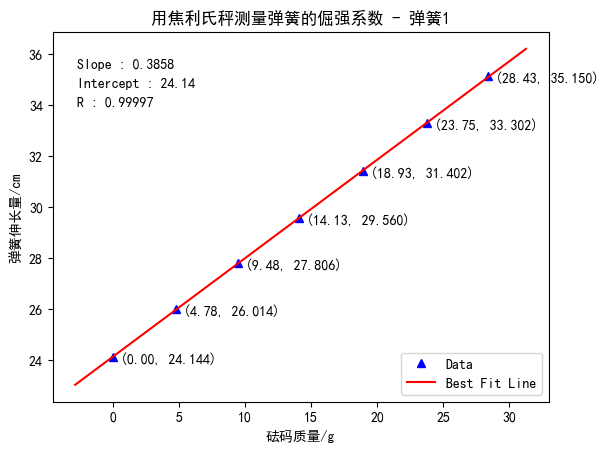

In [133]:
x = [0, 4.78, 9.48, 14.13, 18.93, 23.75, 28.43]
y_1 = [24.144, 26.014, 27.806, 29.560, 31.402, 33.302, 35.150]
y_2 = [30.002, 32.076, 34.078, 36.072, 38.162, 40.246, 42.252]
x = np.array(x)
y_1 = np.array(y_1)
y_2 = np.array(y_2)
def get_k(x, y):
	# x : m, in g
	# y : delta_x, in cm
	# m * g = k * delta_x
	# => k = m / delta_x * g
	g = 9.794
	m = x * 0.001
	delta_x = y * 0.01
	slope, intercept, r_value, p_value, std_err = stats.linregress(delta_x, m)
	return slope * g

k_1 = get_k(x, y_1)

print("k1 = {:.3f}".format(k_1))

linear_fit_plot(x, y_1,
				title="用焦利氏秤测量弹簧的倔强系数 - 弹簧1",
				x_label="砝码质量/g",
				y_label="弹簧伸长量/cm",
				data_annotation="({:.2f}, {:.3f})",
				slope_annotation="{:.4f}",
				intercept_annotation="{:.2f}",
				r_value_annotation="{:.5f}"
)

k2 = 2.273


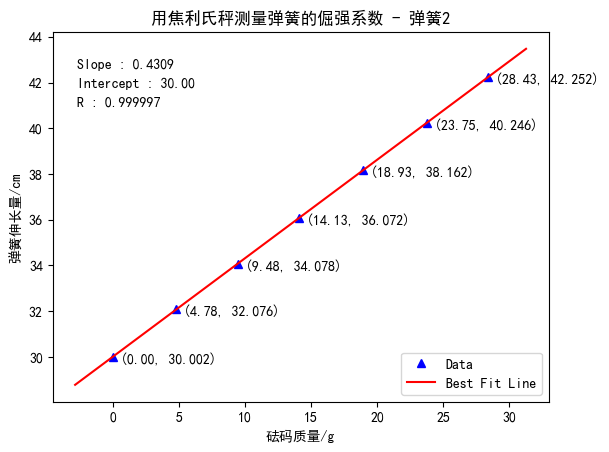

In [134]:
k_2 = get_k(x, y_2)

print("k2 = {:.3f}".format(k_2))

linear_fit_plot(x, y_2,
				title="用焦利氏秤测量弹簧的倔强系数 - 弹簧2",
				x_label="砝码质量/g",
				y_label="弹簧伸长量/cm",
				data_annotation="({:.2f}, {:.3f})",
				slope_annotation="{:.4f}",
				intercept_annotation="{:.2f}",
				r_value_annotation="{:.6f}"
)


## 2. The relationship between the period of oscillation and the mass of the body

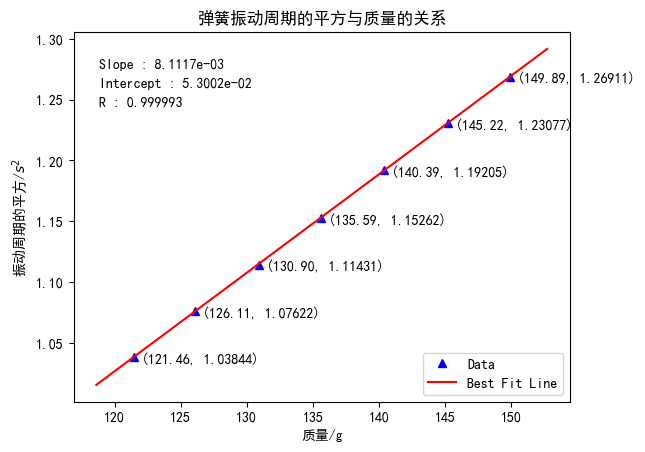

In [135]:
# 12146 12611 13090 13559 14039 145.22 14989
M = [121.46, 126.11, 130.90, 135.59, 140.39, 145.22, 149.89]	# the mass of the object, in g
# 10190.4 10374.1 105561 107360 109181 110940 112655
ten_T = [10190.4, 10374.1, 10556.1, 10736.0, 10918.1, 11094.0, 11265.5]	# the time of 10 oscillations, in ms
M = np.array(M)
ten_T = np.array(ten_T)

T_square = ten_T / 10 / 1000
T_square = T_square ** 2

linear_fit_plot(M, T_square,
				title="弹簧振动周期的平方与质量的关系",
				x_label="质量/g",
				y_label="振动周期的平方/$s^2$",
				data_annotation="({:.2f}, {:.5f})",
				# slope_annotation="{:.7f}",
				# use scientific notation
				slope_annotation="{:.4e}",
				intercept_annotation="{:.4e}",
				r_value_annotation="{:.6f}"
)

In [136]:
def get_k_from_T_square(M, T_square):
	# T_square = 4 * pi^2 * m / k
	# => k = 4 * pi^2 * m / T_square
	M = M * 0.001	# convert to kg
	slope, intercept, r_value, p_value, std_err = stats.linregress(M, T_square)
	return 4 * np.pi ** 2 / slope

k = get_k_from_T_square(M, T_square)
k_from_J = k_1 + k_2

print("k = {:.3f}".format(k))
print("k_from_J = {:.3f}".format(k_from_J))
print("relative error = {:.2f}%".format((k - k_from_J) / k_from_J * 100))

k = 4.867
k_from_J = 4.811
relative error = 1.16%


In [137]:
def get_m0(M, T_square):
	# T_square = 4 * pi^2 * (M + m_0) / k
	# => m_0 = intercept
	M = M * 0.001	# convert to kg
	slope, intercept, r_value, p_value, std_err = stats.linregress(T_square, M)
	return - intercept

m_0 = get_m0(M, T_square)
m_0 = m_0 * 1000	# convert to g

m_0_actual = 11.07 + 10.70
m_0_actual = m_0_actual / 3

print("m_0 = {:.2f}".format(m_0))
print("m_0_actual = {:.2f}".format(m_0_actual))
print("relative error = {:.2f}%".format((m_0 - m_0_actual) / m_0_actual * 100))

m_0 = 6.53
m_0_actual = 7.26
relative error = -9.99%


## 3. The relationship between the period of oscillation and the amplitude of oscillation

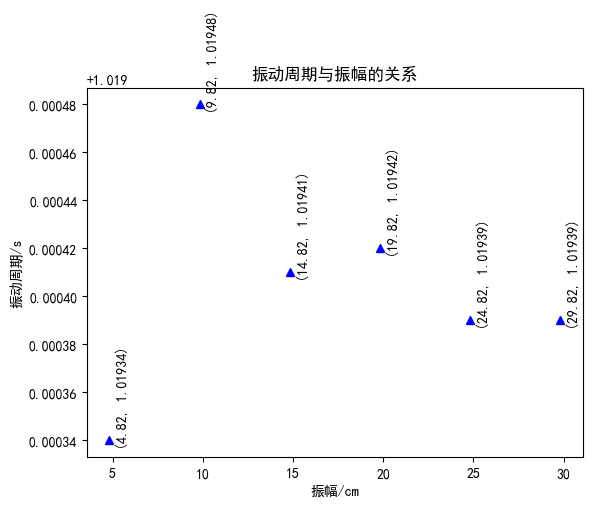

In [138]:
A_1 = [60.00, 55.00, 50.00, 45.00, 40.00, 35.00]
# A_1 = [55.00, 50.00, 45.00, 40.00, 35.00]
A_0 = 64.82
A = [A_0 - a for a in A_1]
A = np.array(A)
ten_T = [10193.4, 10194.8, 10194.1, 10194.2, 10193.9, 10193.9]
# ten_T = [10194.8, 10194.1, 10194.2, 10193.9, 10193.9]
ten_T = np.array(ten_T)
T = ten_T / 10 / 1000

# linear_fit_plot(A, T,
# 				title="振动周期与振幅的关系",
# 				x_label="振幅/cm",
# 				y_label="振动周期/s",
# 				data_annotation="({:.2f}, {:.5f})",
# 				slope_annotation="{:.4f}",
# 				intercept_annotation="{:.4f}",
# 				r_value_annotation="{:.6f}"
# )
scatter_plot(A, T,
				title="振动周期与振幅的关系",
				x_label="振幅/cm",
				y_label="振动周期/s",
				data_annotation="({:.2f}, {:.5f})"
)

## 4. The relationship between the amplitude of oscillation and the maximum speed of the body

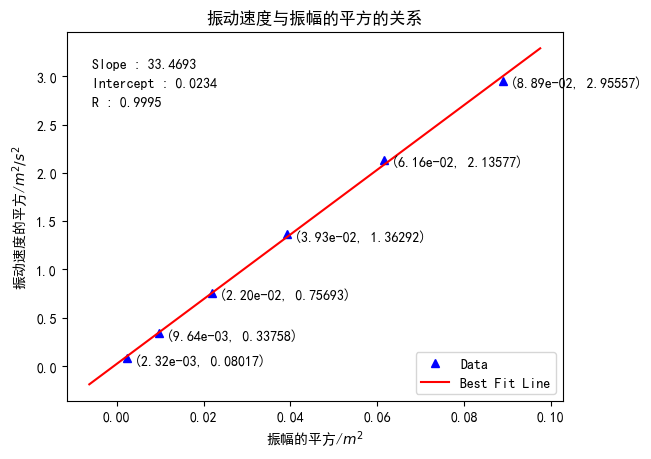

k = 4.627
k_from_J = 4.811
relative error = -3.83%


In [139]:
t = [35.46, 17.28, 11.54, 8.60, 6.87, 5.84]	# the time of the object to pass the obstacle, in ms
t = np.array(t)

l = 0.560 + 0.444	# the length of the obstacle, in cm

v = l * 0.01 / (t / 1000)
v_square = v ** 2

A_square = (A * 0.01) ** 2

linear_fit_plot(A_square, v_square,
				title="振动速度与振幅的平方的关系",
				x_label="振幅的平方/$m^2$",
				y_label="振动速度的平方/$m^2/s^2$",
				data_annotation="({:.2e}, {:.5f})",
				slope_annotation="{:.4f}",
				intercept_annotation="{:.4f}",
				r_value_annotation="{:.4f}"
)

def get_k_from_v_square(A_square, v_square):
	# (M + m_0) * v_square = k * A_square
	M = 130.98
	M += m_0_actual
	M = M * 0.001	# convert to kg
	slope, intercept, r_value, p_value, std_err = stats.linregress(A_square, v_square)
	return slope * M

k = get_k_from_v_square(A_square, v_square)
print("k = {:.3f}".format(k))
print("k_from_J = {:.3f}".format(k_from_J))
print("relative error = {:.2f}%".format((k - k_from_J) / k_from_J * 100))

## 5. The relationship between the period of oscillation and the slope of the track

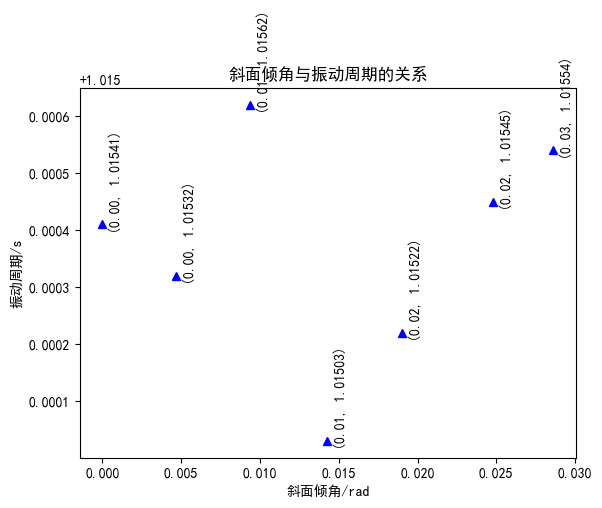

In [140]:
# 0-402 0.8041.226 1.634 2.130 2458
h = [0.000, 0.402, 0.804, 1.226, 1.634, 2.130, 2.458]	# the height of the object, in cm
L = 118.00 - 32.15	# the length of the pendulum, in cm

h = np.array(h)
theta = np.arctan(h / L)

# 541 532 562 503 522 545 554
ten_T = [10154.1, 10153.2, 10156.2, 10150.3, 10152.2, 10154.5, 10155.4]
ten_T = np.array(ten_T)

T = ten_T / 10 / 1000

scatter_plot(theta, T,
				title="斜面倾角与振动周期的关系",
				x_label="斜面倾角/rad",
				y_label="振动周期/s",
				data_annotation="({:.2f}, {:.5f})"
)